In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# import mnist dataset
from dataset.dataset import Dataset
# custom library
from utility.utility import Utility
from network.loss_functions import Loss
from network.early_stopping import EarlyStopping
from network.neural_network import NeuralNetwork
from network.activation_functions import ActivationFunctions

In [2]:
# get dataset
X_train, Y_train, X_test, Y_test = Dataset.load_mnist()
X_train, Y_train, X_val, Y_val = Dataset.train_val_split(X_train, Y_train, percentage=0.2, random_state=None)

In [3]:
# print dataset 
Utility.print_info_dataset(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

+-----------+-----------+-----------+
| Dataset   |   X shape |   Y shape |
+===========+===========+===========+
| X_train   |       784 |     48000 |
+-----------+-----------+-----------+
| Y_train   |        10 |     48000 |
+-----------+-----------+-----------+
| X_val     |       784 |     12000 |
+-----------+-----------+-----------+
| Y_val     |        10 |     12000 |
+-----------+-----------+-----------+
| X_test    |       784 |     10000 |
+-----------+-----------+-----------+
| Y_test    |        10 |     10000 |
+-----------+-----------+-----------+ 



In [8]:
# initialize the network
nn = NeuralNetwork(input_size=X_train.shape[0],
                   output_size=Y_train.shape[0],
                   n_hidden_layers=1,
                   m_neurons_list=[50],
                   activation_list=[ActivationFunctions.sigmoid, ActivationFunctions.identity],
                   error_function=Loss.cross_entropy_softmax)

In [5]:
# print network info
nn.summary()

Network summary

 +-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
|      Layer      |   Input size |   Output size |    #N. of neurons  | Weights shape   | Activation    | Error                 |
|                 |              |               |    of hidden layer |                 | functions     | functions             |
+=================+==============+===============+====================+=================+===============+=======================+
|      Input      |          784 |               |                    |                 |               |                       |
+-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
| Hidden Layer #1 |              |               |                 50 | (50, 784)       | sigmoid       |                       |
+-----------------+--------------+---------------+--------------------+-

In [6]:
# copy the network to compare with an untrained one
not_trained = nn.copy_network()

In [9]:
# training
res = nn.train(x_train=X_train, 
                y_train=Y_train, 
                x_val=X_val, 
                y_val=Y_val,
                learning_rate=0.002,
                momentum=0.9,
                epochs=20,
                early_stopper=EarlyStopping(),
                mode='mini-batch',
                num_mini_batches=32)

Learning mode is mini-batch
[==============================]




Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 42.88it/s]


Epoch 1/20
[==============================] - 0.79s/step - loss: 16109.2232 - accuracy: 0.9038 - val_loss: 4315.6375 - val_accuracy: 0.8990 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 73.75it/s]


Epoch 2/20
[==============================] - 0.47s/step - loss: 11031.7245 - accuracy: 0.9325 - val_loss: 3174.6563 - val_accuracy: 0.9237 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 63.93it/s]


Epoch 3/20
[==============================] - 0.52s/step - loss: 9154.0952 - accuracy: 0.9432 - val_loss: 2775.3801 - val_accuracy: 0.9339 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 49.13it/s]


Epoch 4/20
[==============================] - 0.67s/step - loss: 8154.3955 - accuracy: 0.9491 - val_loss: 2607.2870 - val_accuracy: 0.9371 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 33.64it/s]


Epoch 5/20
[==============================] - 0.98s/step - loss: 6810.8805 - accuracy: 0.9583 - val_loss: 2317.6260 - val_accuracy: 0.9451 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 38.60it/s]


Epoch 6/20
[==============================] - 0.86s/step - loss: 6466.0178 - accuracy: 0.9599 - val_loss: 2261.4587 - val_accuracy: 0.9463 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 73.26it/s]


Epoch 7/20
[==============================] - 0.45s/step - loss: 6306.7960 - accuracy: 0.9609 - val_loss: 2256.2416 - val_accuracy: 0.9474 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 79.85it/s]


Epoch 8/20
[==============================] - 0.42s/step - loss: 6162.8027 - accuracy: 0.9607 - val_loss: 2277.4066 - val_accuracy: 0.9471 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 79.90it/s]


Epoch 9/20
[==============================] - 0.41s/step - loss: 6061.8826 - accuracy: 0.9612 - val_loss: 2319.2100 - val_accuracy: 0.9476 -  p: 14



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 42.92it/s]


Epoch 10/20
[==============================] - 0.77s/step - loss: 5677.1543 - accuracy: 0.9630 - val_loss: 2233.9368 - val_accuracy: 0.9497 -  p: 13



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 41.37it/s]


Epoch 11/20
[==============================] - 0.81s/step - loss: 5415.9466 - accuracy: 0.9644 - val_loss: 2197.0774 - val_accuracy: 0.9488 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 52.07it/s]


Epoch 12/20
[==============================] - 0.64s/step - loss: 5493.1304 - accuracy: 0.9640 - val_loss: 2284.6320 - val_accuracy: 0.9469 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 73.54it/s]


Epoch 13/20
[==============================] - 0.46s/step - loss: 4970.4189 - accuracy: 0.9676 - val_loss: 2118.8960 - val_accuracy: 0.9508 -  p: 14



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 35.57it/s]


Epoch 14/20
[==============================] - 0.94s/step - loss: 5092.5562 - accuracy: 0.9668 - val_loss: 2146.6074 - val_accuracy: 0.9503 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 41.92it/s]


Epoch 15/20
[==============================] - 0.81s/step - loss: 4689.4415 - accuracy: 0.9695 - val_loss: 2121.0473 - val_accuracy: 0.9517 -  p: 14



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 71.18it/s]


Epoch 16/20
[==============================] - 0.48s/step - loss: 4271.0620 - accuracy: 0.9723 - val_loss: 2070.1325 - val_accuracy: 0.9521 -  p: 13



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 76.79it/s]


Epoch 17/20
[==============================] - 0.42s/step - loss: 4164.8828 - accuracy: 0.9724 - val_loss: 2042.7280 - val_accuracy: 0.9528 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 42.48it/s]


Epoch 18/20
[==============================] - 0.80s/step - loss: 3886.1288 - accuracy: 0.9742 - val_loss: 1968.1356 - val_accuracy: 0.9538 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 39.34it/s]


Epoch 19/20
[==============================] - 0.85s/step - loss: 3786.9800 - accuracy: 0.9747 - val_loss: 1931.5223 - val_accuracy: 0.9550 -  p: 15



Processing mini-batches: 100%|██████████| 32/32 [00:00<00:00, 55.21it/s]


Epoch 20/20
[==============================] - 0.61s/step - loss: 3578.3297 - accuracy: 0.9766 - val_loss: 1900.4964 - val_accuracy: 0.9567 -  p: 15
Total time: 13.17s


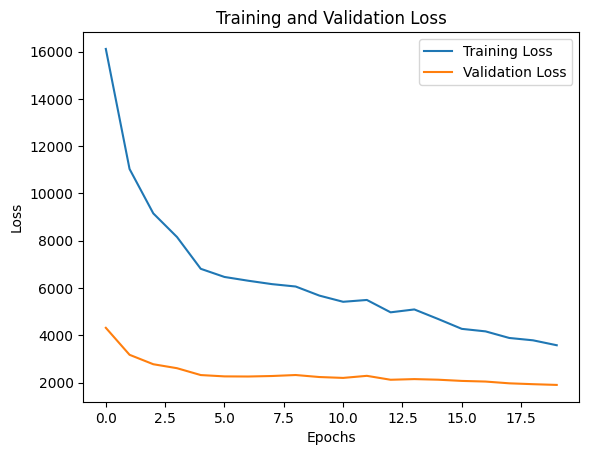

In [10]:
# plot Loss
plt.figure()
plt.plot(res['Loss_train'], label="Training Loss")
plt.plot(res['Loss_val'], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

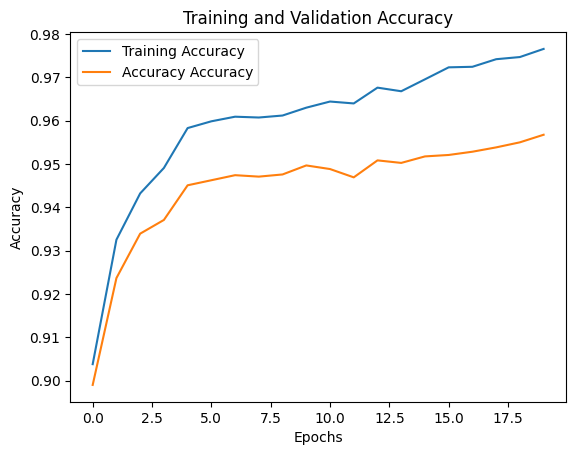

In [11]:
# plot Accuracy
plt.figure()
plt.plot(res['Accuracy_train'], label="Training Accuracy")
plt.plot(res['Accuracy_val'], label="Accuracy Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close() 

Accuracy 0.9598

Report:
              precision    recall  f1-score   support

     Digit 0       0.96      0.98      0.97       980
     Digit 1       0.99      0.99      0.99      1135
     Digit 2       0.95      0.98      0.96      1032
     Digit 3       0.95      0.96      0.95      1010
     Digit 4       0.96      0.96      0.96       982
     Digit 5       0.96      0.93      0.95       892
     Digit 6       0.97      0.97      0.97       958
     Digit 7       0.98      0.93      0.96      1028
     Digit 8       0.93      0.96      0.94       974
     Digit 9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



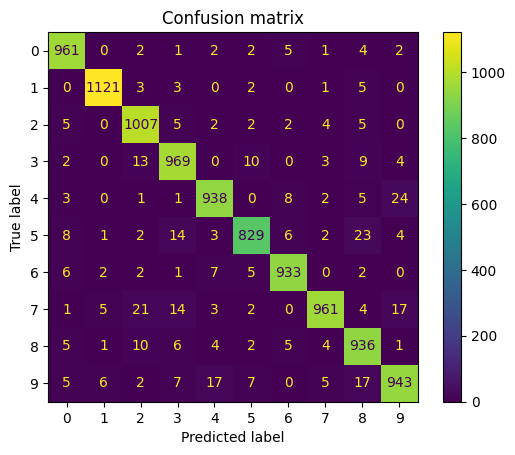

In [12]:
# evaluation of trained model
target_names = ['Digit 0', 'Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5', 
                'Digit 6', 'Digit 7', 'Digit 8', 'Digit 9',]
accuracy, confusion_matrix, report = nn.evaluate_model(X_test, Y_test, target_names)
# print results
print(f"Accuracy {accuracy}\n")
print(f"Report:\n{report}")
# plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=np.arange(10))
display.plot()
plt.title("Confusion matrix")
plt.show()

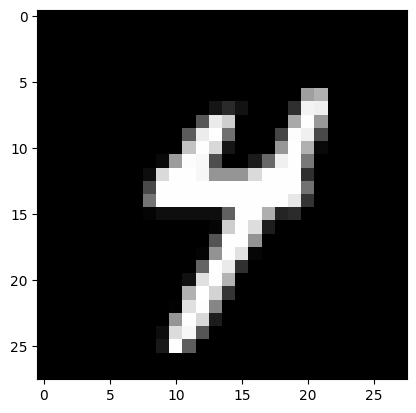


Element chosen has [[4]] and has shape (784, 1)



In [13]:
# get random element from test set
elem, label = Utility.get_random_elem(X_test, Y_test)
print(f"\nElement chosen has [{label}] and has shape {elem.shape}\n")

In [14]:
# print prediction
trained_prediction = nn.predict(elem)
not_trained_prediction = not_trained.predict(elem)
print("Prediction from trained network:\n", trained_prediction, "\nNetwork prediction: ", np.argmax(trained_prediction))
print("=" * 50)
print("Prediction from NOT trained network:\n", not_trained_prediction, "\nNetwork prediction: ", np.argmax(not_trained_prediction))
print("=" * 50, "\n")

Prediction from trained network:
 [[2.96185078e-07]
 [3.74759481e-06]
 [1.52940907e-08]
 [4.92773980e-06]
 [9.85782064e-01]
 [3.68811060e-05]
 [3.31949943e-07]
 [8.33441362e-05]
 [1.08535664e-04]
 [1.39798563e-02]] 
Network prediction:  4
Prediction from NOT trained network:
 [[0.132204  ]
 [0.1031793 ]
 [0.0790289 ]
 [0.09998762]
 [0.11001262]
 [0.09696522]
 [0.05790099]
 [0.08483648]
 [0.0789983 ]
 [0.15688657]] 
Network prediction:  9

